<a href="https://colab.research.google.com/github/ckckck1373/LearnPytorch/blob/master/(%E8%8E%AB%E7%85%A92)Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable #for backward prop.
import torch.nn.functional as F #激勵函數
import matplotlib.pyplot as plt

#fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)    # class0 x data (tensor), shape = (100,2)
y0 = torch.zeros(100)             # class0 y data (tensor), shape = (100,)
x1 = torch.normal(-2*n_data, 1)   # class1 x data (tensor), shape = (100,1)
y1 = torch.ones(100)              # class1 y data (tensor), shape = (100,)


#注意x,y數據的形式一定要像下面一樣(torch.cat合併數據)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) # FloatTensor = 32-bit floating 
#torch.cat((x1,x2), num) num=0從下面接;num=1從右邊接

y = torch.cat((y0, y1),).type(torch.LongTensor)    # LongTensor = 64-bit integer

# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
#                          #取第0列               取第1列
# plt.show()
x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


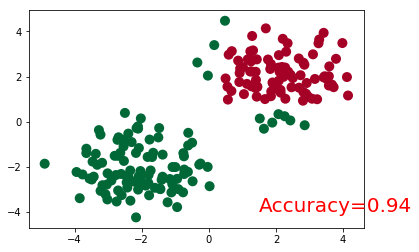

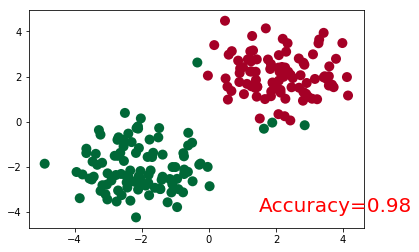

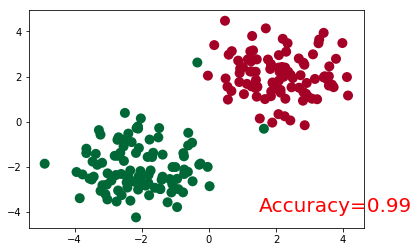

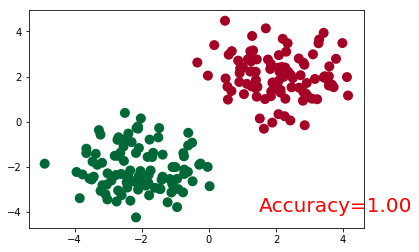

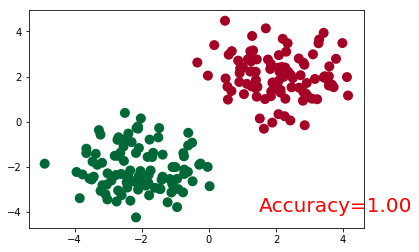

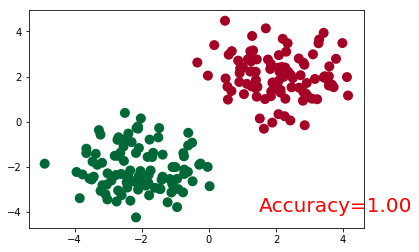

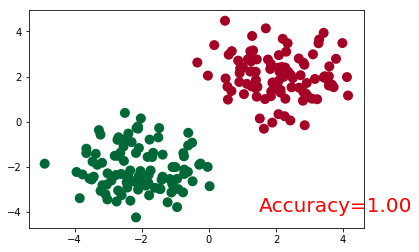

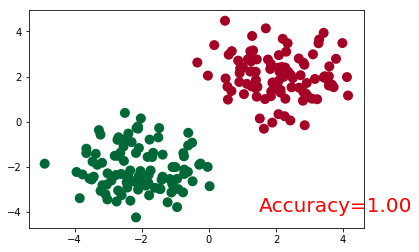

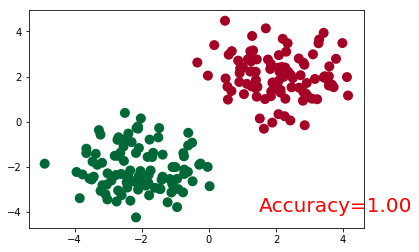

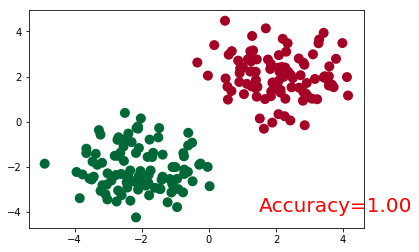

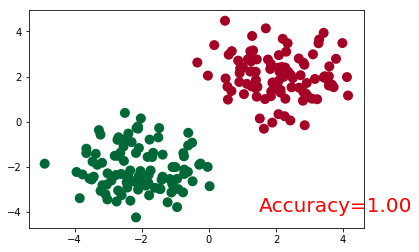

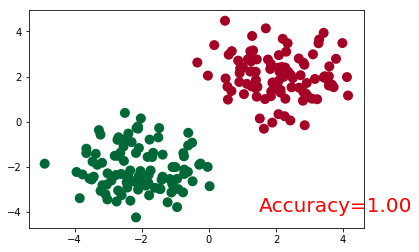

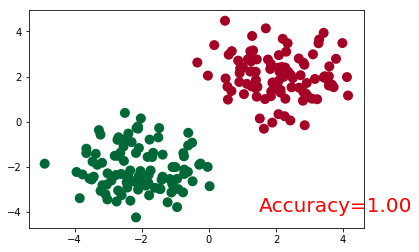

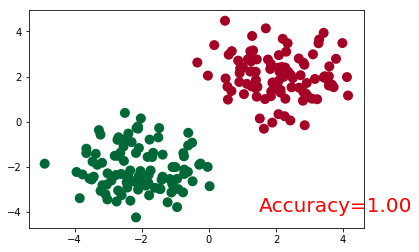

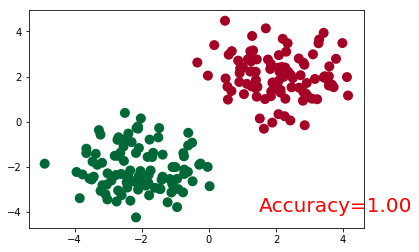

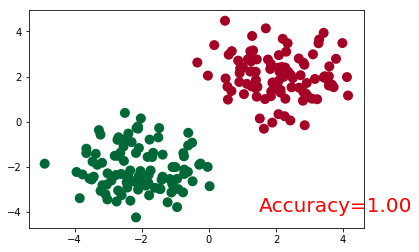

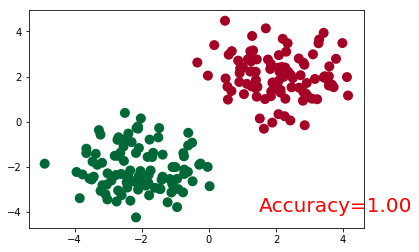

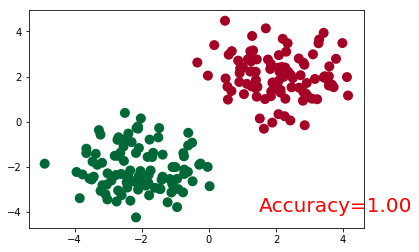

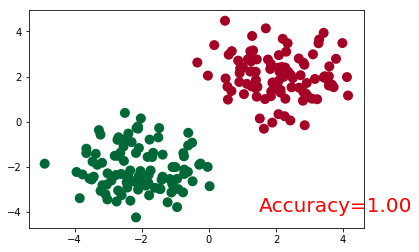

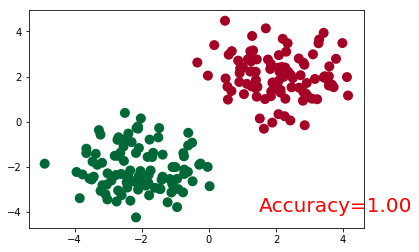

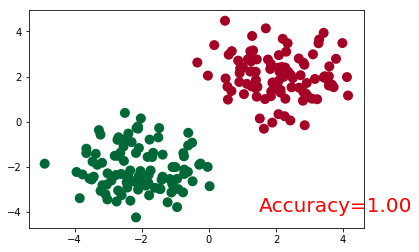

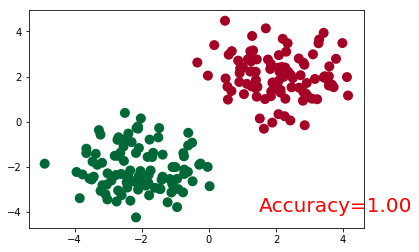

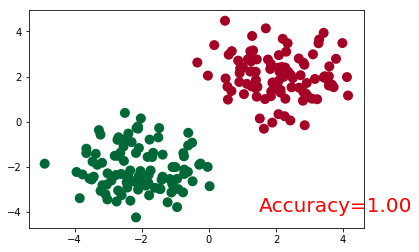

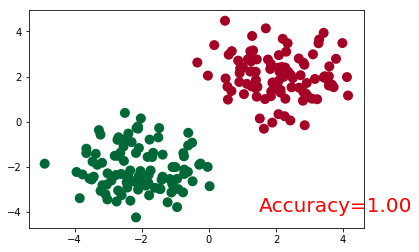

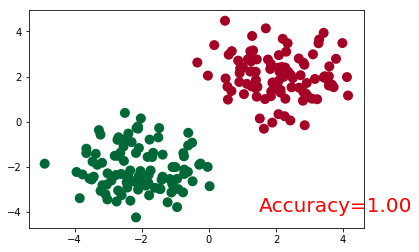

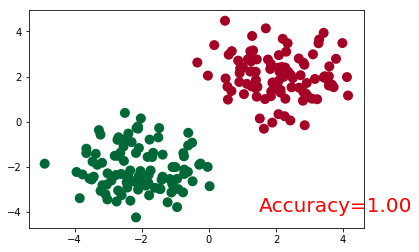

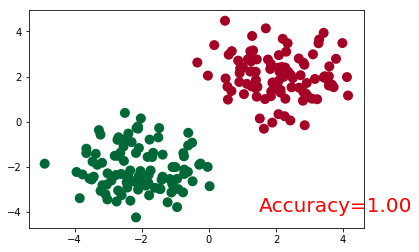

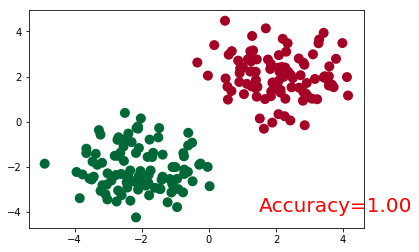

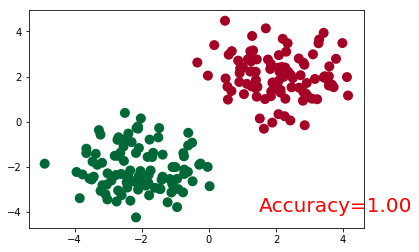

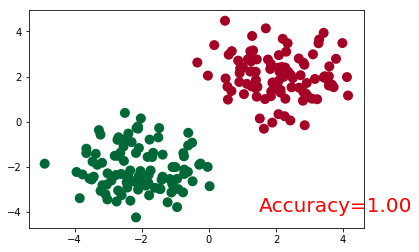

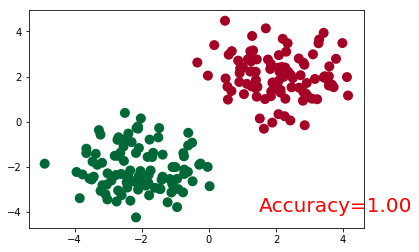

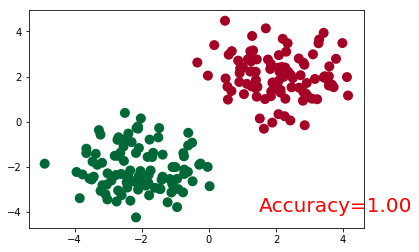

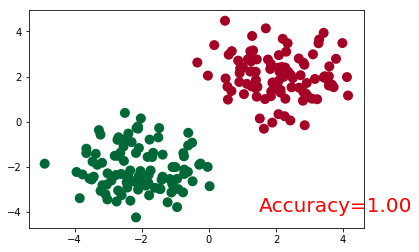

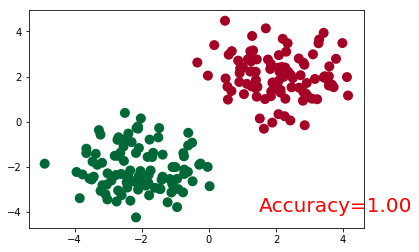

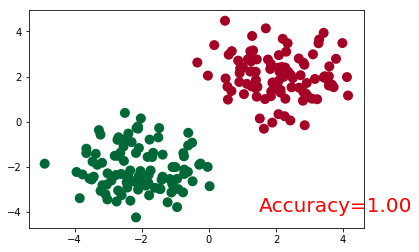

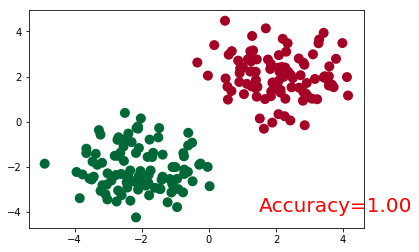

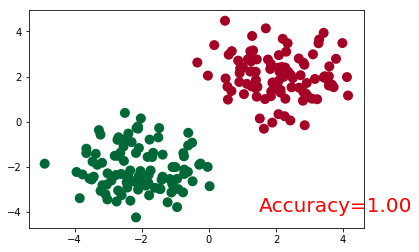

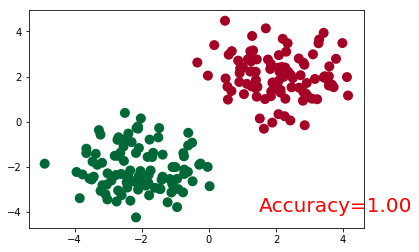

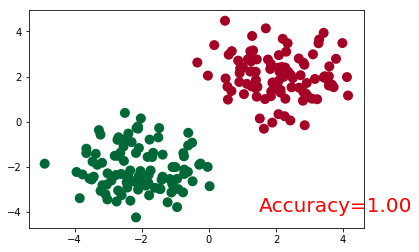

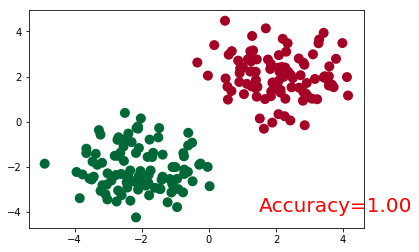

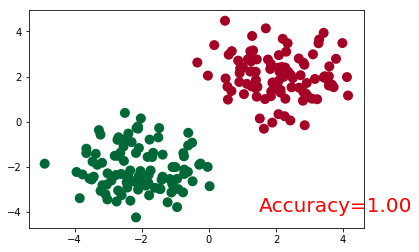

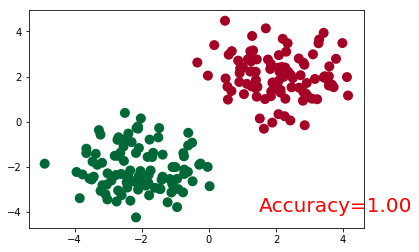

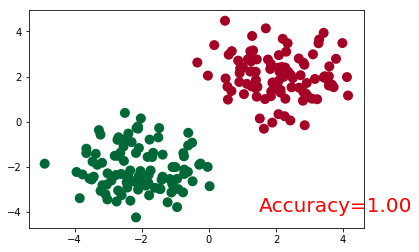

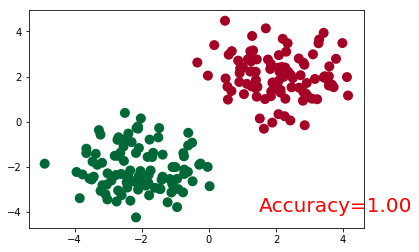

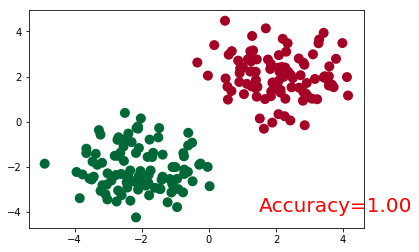

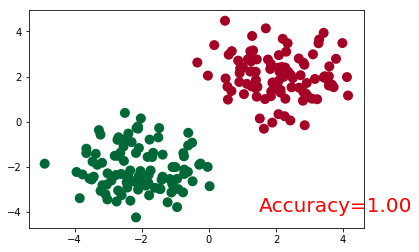

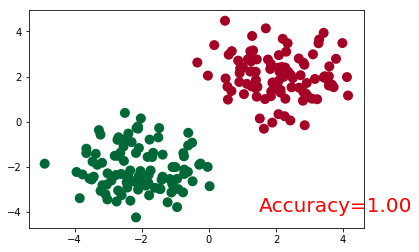

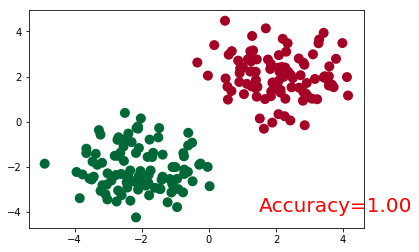

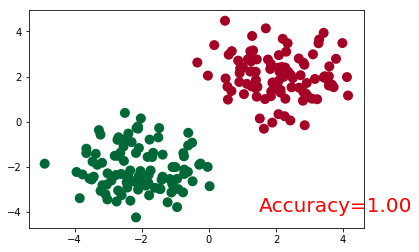

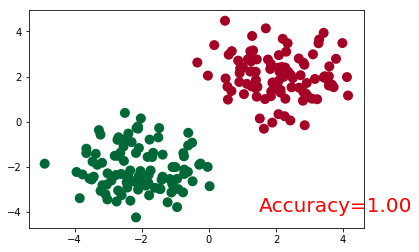

In [35]:
class Net(torch.nn.Module): #繼承Module的模塊
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__() #官方步驟，繼承__init__ 功能
    self.hidden = torch.nn.Linear(n_feature, n_hidden) #影藏層線性輸出 
    self.predict = torch.nn.Linear(n_hidden, n_output) #n_output = 1 (預測一個y)
    
  
  def forward(self, x): #神經網路前向傳遞的流程圖，同時也是Module中的forward功能
    x = F.relu(self.hidden(x))
    x = self.predict(x) #不用激勵函數，因為某些data會被截斷
    return x 
  

net = Net(n_feature = 2,n_hidden =10, n_output= 2)
#[0, 1]分為1 ;[1, 0]分為0 ;[0, 0, 1]分為2  (多分類)

print(net)

plt.ion() #something about plotting 變成時時打印的功能
plt.show() 


#opt
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)#lr學習速率 
loss_func = torch.nn.CrossEntropyLoss()
#[0.1, 0.2, 0.7] =1 #每一個類型的概率

for t in range(100):
  out= net(x) #餵net訓練數據x，輸出預測值
              #[-2, -12, 20] by F.softmax(out) => [0.1, 0.2, 0.7](prediction)
    
  loss = loss_func(out, y) #計算兩者的誤差 (prediction, true)
  
  optimizer.zero_grad() #清空上一步的殘餘更新參數值
  loss.backward() #計算節點的梯度
  optimizer.step() #以學習效率來優化我們的parameter再施加到net上
  
  
  if t % 2 == 0:
    #plot and show learning process
    plt.cla()
    prediction = torch.max(F.softmax(out), 1)[1] #[1]返回索引 [0]返回值
    pred_y = prediction.data.numpy().squeeze()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/200. #預測中有多少和真實值一樣
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)
    
  plt.ioff() #停止畫圖
  plt.show()